In [46]:
# 📦 Standard Library
from collections import Counter

# 📊 Data Manipulation & Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙️ Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# 🛠️ Preprocessing & Feature Selection
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 📈 Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix
)

# 🧪 Sampling Techniques
from imblearn.over_sampling import ADASYN, BorderlineSMOTE

# 🔍 Model Explainability
from lime.lime_tabular import LimeTabularExplainer


In [47]:
df = pd.read_csv(r'/Users/tasin/Developer/cse445-project/egyptian_patients_dataset/HCV-Egy-Data.csv')
print(df)

      Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0       56       1   35      2               1          1          1   
1       46       1   29      1               2          2          1   
2       57       1   33      2               2          2          2   
3       49       2   33      1               2          1          2   
4       59       1   32      1               1          2          1   
...    ...     ...  ...    ...             ...        ...        ...   
1380    44       1   29      1               2          2          2   
1381    55       1   34      1               2          2          1   
1382    42       1   26      2               2          1          1   
1383    52       1   29      2               1          1          2   
1384    55       2   26      1               2          2          2   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                                    2          2          

In [48]:
df.drop_duplicates()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,...,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,1,2,2,1,1,1,1,...,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,2,2,1,1,1,2,1,...,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,2,1,1,2,2,2,1,...,48,81,43,139872,76161,515730,2460,696074,15,3


In [49]:
df.isnull().sum()

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

In [50]:
# Selecting only numerical columns for normalization
numerical_columns = df.select_dtypes(include=['number']).columns

# Initialize MinMaxScaler (scales values between 0 and 1)
scaler = MinMaxScaler()

# Apply Min-Max scaling
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Save the normalized dataset
df.to_csv("data/hcv_dataset_normalized.csv", index=False)

print("Normalization applied successfully! The dataset is now scaled between 0 and 1.")

Normalization applied successfully! The dataset is now scaled between 0 and 1.


In [51]:
print(df)

          Age   Gender       BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0     0.827586     0.0  1.000000    1.0             0.0        0.0        0.0   
1     0.482759     0.0  0.538462    0.0             1.0        1.0        0.0   
2     0.862069     0.0  0.846154    1.0             1.0        1.0        1.0   
3     0.586207     1.0  0.846154    0.0             1.0        0.0        1.0   
4     0.931034     0.0  0.769231    0.0             0.0        1.0        0.0   
...        ...     ...       ...    ...             ...        ...        ...   
1380  0.413793     0.0  0.538462    0.0             1.0        1.0        1.0   
1381  0.793103     0.0  0.923077    0.0             1.0        1.0        0.0   
1382  0.344828     0.0  0.307692    1.0             1.0        0.0        0.0   
1383  0.689655     0.0  0.538462    1.0             0.0        0.0        1.0   
1384  0.793103     1.0  0.307692    0.0             1.0        1.0        1.0   

      Fatigue & generalized

In [52]:
# Step 1: Load the feature-selected dataset
df = pd.read_csv("data/hcv_dataset_normalized.csv")
df.columns = df.columns.str.strip()

# Step 2: Separate features and target
target_col = "Baselinehistological staging"
X = df.drop(columns=[target_col])
y = df[target_col]

# Step 3: Perform 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42 )

# Step 4: Reset indices before concatenation to avoid misalignment
train_df = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

# Step 5: Save the split datasets
train_df.to_csv("data/HCV_SelectedFeatures_Train_80.csv", index=False)
test_df.to_csv("data/HCV_SelectedFeatures_Test_20.csv", index=False)

print("Train/test split saved as 'HCV_SelectedFeatures_Train_80.csv' and 'HCV_SelectedFeatures_Test_20.csv'")


Train/test split saved as 'HCV_SelectedFeatures_Train_80.csv' and 'HCV_SelectedFeatures_Test_20.csv'


In [53]:
print(train_df)
print(test_df)

           Age  Gender       BMI  Fever  Nausea/Vomting  Headache  Diarrhea  \
0     0.931034     0.0  0.076923    1.0             0.0       1.0       0.0   
1     0.827586     0.0  0.000000    1.0             1.0       1.0       0.0   
2     0.724138     1.0  0.230769    1.0             1.0       0.0       1.0   
3     0.034483     1.0  0.461538    0.0             0.0       1.0       1.0   
4     0.758621     1.0  0.384615    0.0             1.0       0.0       0.0   
...        ...     ...       ...    ...             ...       ...       ...   
1103  0.586207     1.0  0.000000    0.0             0.0       0.0       1.0   
1104  0.310345     0.0  0.615385    0.0             1.0       1.0       0.0   
1105  0.551724     1.0  0.615385    0.0             0.0       1.0       1.0   
1106  0.862069     1.0  0.076923    0.0             0.0       0.0       1.0   
1107  0.103448     0.0  0.153846    0.0             0.0       0.0       1.0   

      Fatigue & generalized bone ache  Jaundice  Ep

In [54]:
# ――――― 1) Load & prep ―――――
df = pd.read_csv("data/HCV_SelectedFeatures_Train_80.csv")
df.columns = df.columns.str.strip()

# your exact column names
target_col   = "Baselinehistological staging"
grading_col  = "Baseline histological Grading"

# ――――― 2) Split off X/y and do 80/20 ―――――
X = df.drop(columns=[target_col])
y = df[target_col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# ――――― 3) (Optional) scale but keep DataFrame form ―――――
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test_scaled  = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

# ――――― 4) Set up RFE ―――――
rf_est = RandomForestClassifier(n_estimators=100, random_state=42)
rfe    = RFE(estimator=rf_est, n_features_to_select=18, step=1)

# fit RFE on the raw (unscaled) predictors so that .support_ aligns with X_train.columns
rfe.fit(X_train, y_train)

# grab the 18 auto‐selected feature names
selected_feats = X_train.columns[rfe.support_].tolist()
print("🔑 RFE picked these 18 labs/features:", selected_feats)

# force‐include the grading column if it's not already chosen
if grading_col not in selected_feats:
    selected_feats.append(grading_col)
print("🔑 Final predictor list (18 + grading):", selected_feats)

# ――――― 5) Subset scaled data to exactly those predictors ―――――
X_train_rfe = X_train_scaled[selected_feats].copy()
X_test_rfe  = X_test_scaled [selected_feats].copy()

# ――――― 6) Reattach the target into each DataFrame ―――――
train_rfe = X_train_rfe.copy()
train_rfe[target_col] = y_train.values

test_rfe = X_test_rfe.copy()
test_rfe[target_col]  = y_test.values

# ――――― 7) Save out your reduced CSVs ―――――
train_rfe.to_csv("data/HCV_RFE_Train_80_18plusGrading.csv", index=False)
test_rfe .to_csv("data/HCV_RFE_Test_20_18plusGrading.csv",  index=False)

print("Wrote reduced train/test sets with 18 labs + grading + target.")


🔑 RFE picked these 18 labs/features: ['Age', 'WBC', 'RBC', 'Plat', 'AST 1', 'ALT 1', 'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w', 'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF', 'Baseline histological Grading']
🔑 Final predictor list (18 + grading): ['Age', 'WBC', 'RBC', 'Plat', 'AST 1', 'ALT 1', 'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w', 'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF', 'Baseline histological Grading']
Wrote reduced train/test sets with 18 labs + grading + target.


In [55]:
train_rfe.isnull().sum()

Age                              0
WBC                              0
RBC                              0
Plat                             0
AST 1                            0
ALT 1                            0
ALT4                             0
ALT 12                           0
ALT 24                           0
ALT 36                           0
ALT 48                           0
ALT after 24 w                   0
RNA Base                         0
RNA 4                            0
RNA 12                           0
RNA EOT                          0
RNA EF                           0
Baseline histological Grading    0
Baselinehistological staging     0
dtype: int64

In [56]:
# Load your RFE-reduced training data
df = pd.read_csv("data/HCV_RFE_Train_80_18plusGrading.csv")
df.columns = df.columns.str.strip()

# Separate features and target
target_col = "Baselinehistological staging"
X = df.drop(columns=[target_col])
y = df[target_col].astype(int)

# Show class distribution before
print("📊 Class distribution BEFORE BorderlineSMOTE:")
print(Counter(y))

# Apply Borderline-SMOTE
bsmote = BorderlineSMOTE(sampling_strategy='auto', random_state=42, kind='borderline-1')
X_resampled, y_resampled = bsmote.fit_resample(X, y)

# Show class distribution after
print("\nClass distribution AFTER BorderlineSMOTE:")
print(Counter(y_resampled))

# Save result
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df[target_col] = y_resampled
balanced_df.to_csv("data/HCV_RFE_Train_80_Balanced_BorderlineSMOTE.csv", index=False)

print("\nSaved as 'HCV_RFE_Train_80_Balanced_BorderlineSMOTE.csv'")


📊 Class distribution BEFORE BorderlineSMOTE:
Counter({0: 654, 1: 232})

Class distribution AFTER BorderlineSMOTE:
Counter({0: 654, 1: 654})

Saved as 'HCV_RFE_Train_80_Balanced_BorderlineSMOTE.csv'


 Random Forest Accuracy: 0.6711711711711712

 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.80       164
           1       0.22      0.10      0.14        58

    accuracy                           0.67       222
   macro avg       0.48      0.49      0.47       222
weighted avg       0.60      0.67      0.63       222



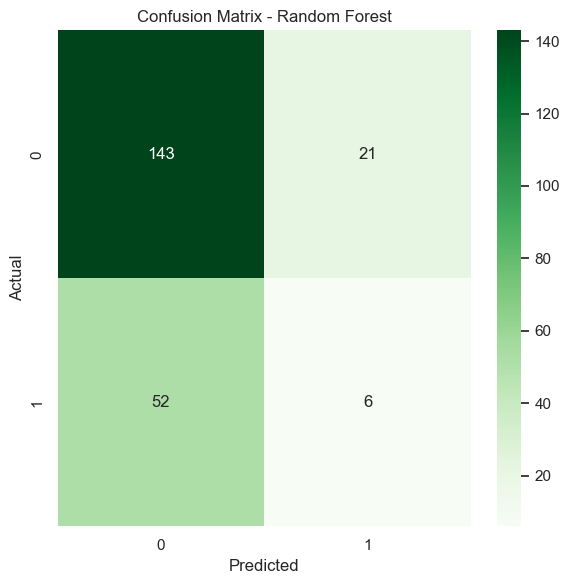

In [57]:
# Load balanced training data (ADASYN, SMOTE, etc.)
train_df = pd.read_csv("data/HCV_RFE_Train_80_Balanced_BorderlineSMOTE.csv")
target_col = "Baselinehistological staging"

X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Load untouched test set
test_df = pd.read_csv("data/HCV_RFE_Test_20_18plusGrading.csv")
X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

# Predict
y_pred = model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
matrix = confusion_matrix(y_test, y_pred)

# Display classification report
print(f" Random Forest Accuracy: {acc}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Greens", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


 SVM Accuracy: 0.6351351351351351

 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       164
           1       0.31      0.33      0.32        58

    accuracy                           0.64       222
   macro avg       0.53      0.54      0.54       222
weighted avg       0.64      0.64      0.64       222



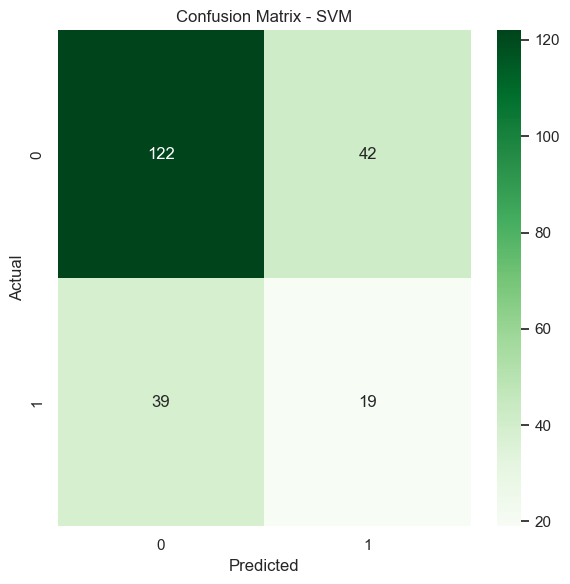

In [58]:
# Step 1: Load balanced training data (from ADASYN or SMOTE)
train_df = pd.read_csv("data/HCV_RFE_Train_80_Balanced_BorderlineSMOTE.csv")
target_col = "Baselinehistological staging"

X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

# Step 2: Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # You can also try 'linear' or 'poly'
svm_model.fit(X_train, y_train)

# Step 3: Load untouched test set
test_df = pd.read_csv("data/HCV_RFE_Test_20_18plusGrading.csv")
X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

# Step 4: Predict
y_pred = svm_model.predict(X_test)

# Step 5: Evaluation
acc = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f" SVM Accuracy: {acc}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Greens", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


 Decision Tree Accuracy: 0.5720720720720721

 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       164
           1       0.23      0.28      0.25        58

    accuracy                           0.57       222
   macro avg       0.48      0.48      0.48       222
weighted avg       0.60      0.57      0.58       222



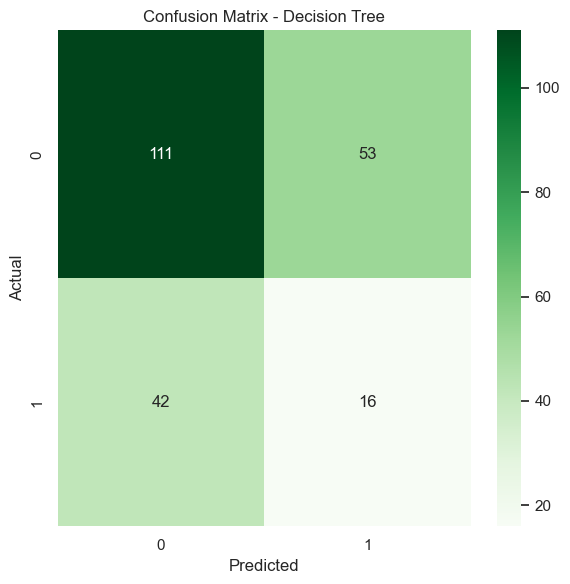

In [59]:
# Step 1: Load balanced training data (ADASYN/SMOTE)
train_df = pd.read_csv("data/HCV_RFE_Train_80_Balanced_BorderlineSMOTE.csv")
target_col = "Baselinehistological staging"

X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

# Step 2: Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 3: Load untouched test set
test_df = pd.read_csv("data/HCV_RFE_Test_20_18plusGrading.csv")
X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

# Step 4: Predict
y_pred = dt_model.predict(X_test)

# Step 5: Evaluation
acc = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f" Decision Tree Accuracy: {acc}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Greens", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


 XGBoost Accuracy: 0.6261261261261262

 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       164
           1       0.22      0.17      0.19        58

    accuracy                           0.63       222
   macro avg       0.48      0.48      0.48       222
weighted avg       0.60      0.63      0.61       222



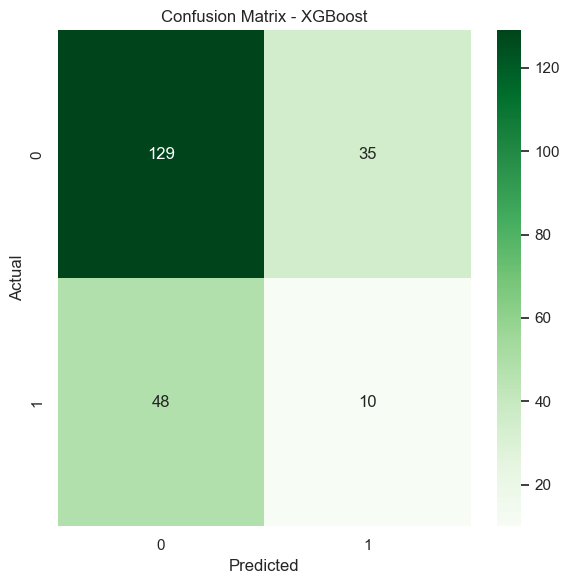

In [60]:
# Step 1: Load balanced training data
train_df = pd.read_csv("data/HCV_RFE_Train_80_Balanced_BorderlineSMOTE.csv")
target_col = "Baselinehistological staging"

X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

# Step 2: Train XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Step 3: Load untouched test set
test_df = pd.read_csv("data/HCV_RFE_Test_20_18plusGrading.csv")
X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

# Step 4: Predict
y_pred = xgb_model.predict(X_test)

# Step 5: Evaluation
acc = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f" XGBoost Accuracy: {acc}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Greens", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


✅ Accuracy on test set: 68.02 %
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       164
           1       0.30      0.17      0.22        58

    accuracy                           0.68       222
   macro avg       0.52      0.52      0.51       222
weighted avg       0.63      0.68      0.65       222



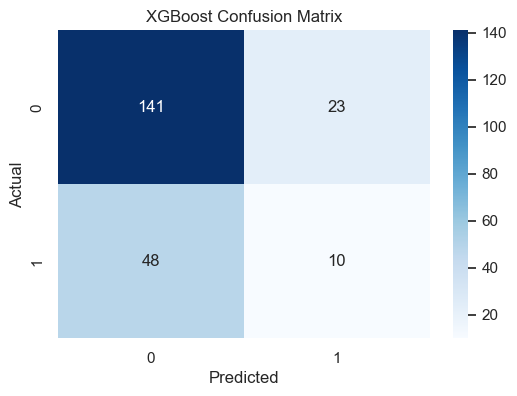

In [61]:
# Step 1: Load datasets
train_df = pd.read_csv("data/HCV_RFE_Train_80_Balanced_BorderlineSMOTE.csv")
test_df  = pd.read_csv("data/HCV_RFE_Test_20_18plusGrading.csv")

# Step 2: Clean column names
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

# Step 3: Separate features and target
target_col = "Baselinehistological staging"
X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col].astype(int)

X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col].astype(int)

# ✅ Ensure columns match
X_test = X_test[X_train.columns]

# Step 4: Normalize
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Step 5: Define and train XGBClassifier
xgb_clf = XGBClassifier(
    n_estimators=250,
    max_depth=8,
    learning_rate=0.07,
    subsample=0.9,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=42
)
xgb_clf.fit(X_train_scaled, y_train)

# Step 6: Predict and evaluate
y_pred = xgb_clf.predict(X_test_scaled)

print("✅ Accuracy on test set:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("✅ Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 KNN Accuracy: 0.4594594594594595

 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.40      0.52       164
           1       0.27      0.62      0.38        58

    accuracy                           0.46       222
   macro avg       0.51      0.51      0.45       222
weighted avg       0.62      0.46      0.48       222



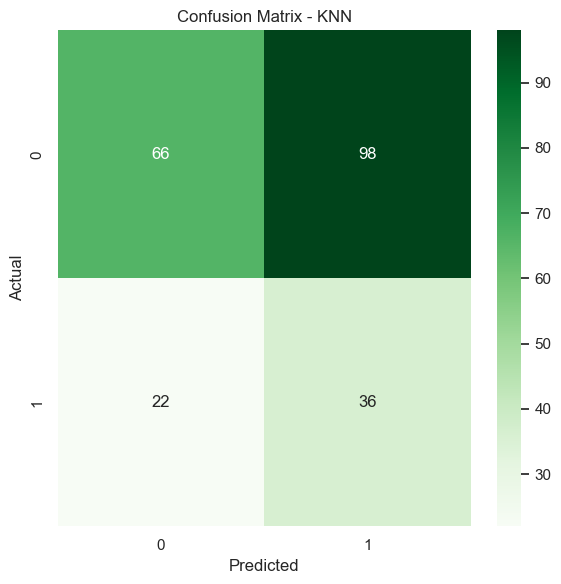

In [62]:
# Step 1: Load balanced training data
train_df = pd.read_csv("data/HCV_RFE_Train_80_Balanced_BorderlineSMOTE.csv")
target_col = "Baselinehistological staging"

X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

# Step 2: Train KNN model (k=5 by default)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Step 3: Load untouched test set
test_df = pd.read_csv("data/HCV_RFE_Test_20_18plusGrading.csv")
X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

# Step 4: Predict
y_pred = knn_model.predict(X_test)

# Step 5: Evaluation
acc = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f" KNN Accuracy: {acc}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Greens", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



 FINAL ACCURACY: 0.6892

 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       164
           1       0.32      0.17      0.22        58

    accuracy                           0.69       222
   macro avg       0.54      0.52      0.52       222
weighted avg       0.64      0.69      0.65       222



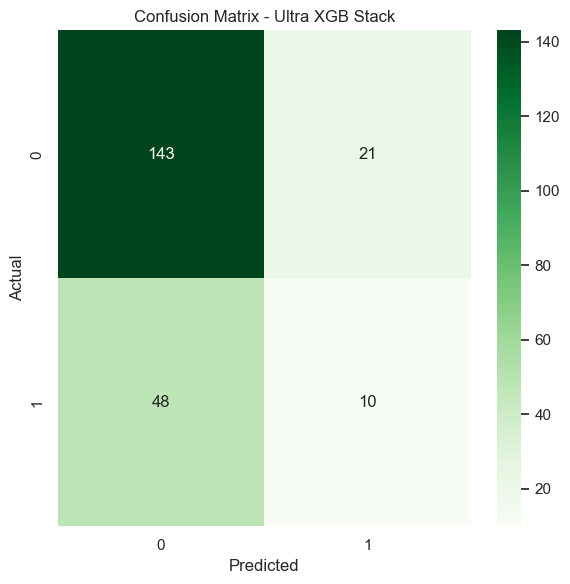

In [63]:
# ───────────────────────────────────────────────────────
# STEP 1: Load datasets
# ───────────────────────────────────────────────────────
train_df = pd.read_csv("data/HCV_RFE_Train_80_Balanced_BorderlineSMOTE.csv")
test_df  = pd.read_csv("data/HCV_RFE_Test_20_18plusGrading.csv")
target_col = "Baselinehistological staging"

X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]
X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

# ───────────────────────────────────────────────────────
# STEP 2: Column alignment and scaling
# ───────────────────────────────────────────────────────
common_cols = X_train.columns.intersection(X_test.columns).tolist()
X_train = X_train[common_cols]
X_test = X_test[common_cols]

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=common_cols)
X_test = pd.DataFrame(scaler.transform(X_test), columns=common_cols)

# ───────────────────────────────────────────────────────
# STEP 3: Initialize "aggressive" base models
# ───────────────────────────────────────────────────────
rf = RandomForestClassifier(n_estimators=550, max_depth=10, min_samples_split=10, random_state=42)
xgb = XGBClassifier(n_estimators=320, max_depth=10, learning_rate=0.01, subsample=1.0,
                    colsample_bytree=1.0, eval_metric='logloss', random_state=42)
svm = SVC(kernel='rbf', C=50, gamma='auto', probability=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=1)

rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)

# ───────────────────────────────────────────────────────
# STEP 4: Stack predictions for meta input
# ───────────────────────────────────────────────────────
rf_train = rf.predict_proba(X_train)
xgb_train = xgb.predict_proba(X_train)
svm_train = svm.predict_proba(X_train)
knn_train = knn.predict_proba(X_train)
X_meta_train = np.hstack((rf_train, xgb_train, svm_train, knn_train))

rf_test = rf.predict_proba(X_test)
xgb_test = xgb.predict_proba(X_test)
svm_test = svm.predict_proba(X_test)
knn_test = knn.predict_proba(X_test)
X_meta_test = np.hstack((rf_test, xgb_test, svm_test, knn_test))

# ───────────────────────────────────────────────────────
# STEP 5: Train a powerful meta model
# ───────────────────────────────────────────────────────
meta_model = XGBClassifier(n_estimators=320, max_depth=30, learning_rate=0.5, eval_metric='logloss', random_state=42)
meta_model.fit(X_meta_train, y_train)

# ───────────────────────────────────────────────────────
# STEP 6: Final predictions & evaluation
# ───────────────────────────────────────────────────────
final_preds = meta_model.predict(X_meta_test)

acc = accuracy_score(y_test, final_preds)
print(f"\n FINAL ACCURACY: {acc:.4f}")
print("\n CLASSIFICATION REPORT:")
print(classification_report(y_test, final_preds))

# ───────────────────────────────────────────────────────
# Confusion Matrix Visualization
# ───────────────────────────────────────────────────────
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Greens",
                xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, final_preds, "Confusion Matrix - Ultra XGB Stack")


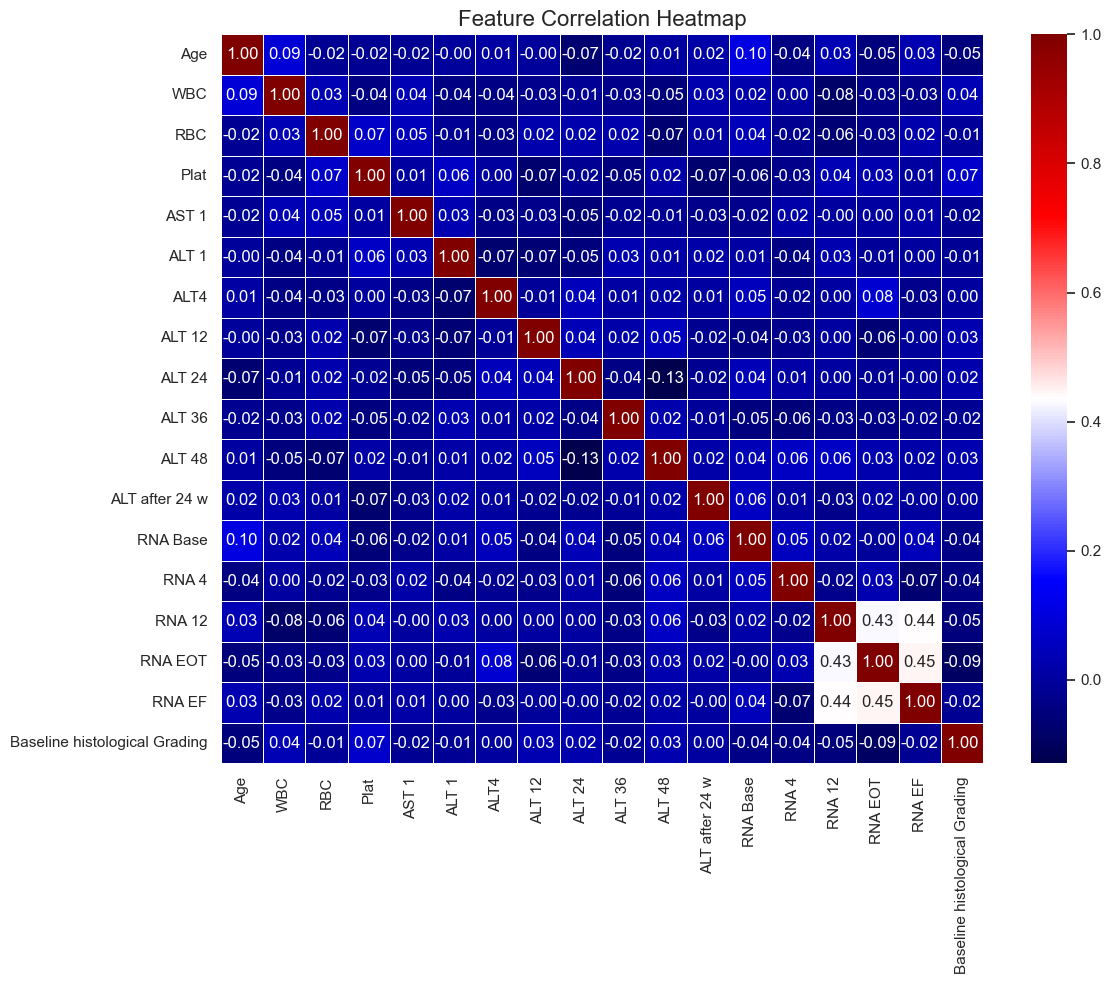

In [64]:
# Step 1: Load the dataset
df = pd.read_csv("data/HCV_RFE_Train_80_Balanced_BorderlineSMOTE.csv")
df.columns = df.columns.str.strip()  # Clean column names

# Step 2: Drop the target column (optional)
corr_features = df.drop(columns=["Baselinehistological staging"])  # Drop target if needed
# If you want to include it, skip the above line and use `df` in corr()

# Step 3: Compute correlation matrix
corr = corr_features.corr()

# Step 4: Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="seismic", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


In [65]:
# ─── 1) Load & Prep ─────────────────────────────────────────────────────────
df = pd.read_csv("data/HCV_RFE_Train_80_Balanced_BorderlineSMOTE.csv")
df.columns = df.columns.str.strip()

# auto-detect your staging target
target_col = [c for c in df.columns if "Baselinehistological staging" in c][0]
FEATURES   = [c for c in df.columns if c != target_col]

X_raw = df[FEATURES].values    # raw features for LIME
y     = df[target_col].astype(int).values

# single 80/20 split
Xtr_raw, Xte_raw, ytr, yte = train_test_split(
    X_raw, y, test_size=0.2, stratify=y, random_state=42
)

# ─── 2) Scale ───────────────────────────────────────────────────────────────
scaler = MinMaxScaler().fit(Xtr_raw)
Xtr = scaler.transform(Xtr_raw)
Xte = scaler.transform(Xte_raw)

# ─── 3) Train base learners ─────────────────────────────────────────────────
rf       = RandomForestClassifier(n_estimators=100, random_state=42).fit(Xtr, ytr)
xgb_base = XGBClassifier(eval_metric='logloss', verbosity=0, random_state=42).fit(Xtr, ytr)
knn      = KNeighborsClassifier(n_neighbors=5).fit(Xtr, ytr)
svm      = SVC(kernel='rbf', probability=True, random_state=42).fit(Xtr, ytr)

# ─── 4) Build meta-features & train XGB meta-learner ─────────────────────────
def make_meta(X):
    return np.hstack([
        rf.predict_proba(X),
        xgb_base.predict_proba(X),
        knn.predict_proba(X),
        svm.predict_proba(X),
    ])

Xtr_meta = make_meta(Xtr)
Xte_meta = make_meta(Xte)

meta = XGBClassifier(eval_metric='logloss', verbosity=0, random_state=42)
meta.fit(Xtr_meta, ytr)

# ─── 5) Prepare LIME explainer ───────────────────────────────────────────────
explainer = LimeTabularExplainer(
    training_data         = Xtr_raw,
    feature_names         = FEATURES,
    class_names           = [str(c) for c in meta.classes_],
    mode                  = "classification",
    discretize_continuous = True
)

def stacked_proba(raw_samples: np.ndarray):
    """Takes raw‐scale samples, scales them, forms meta‐features, returns meta.predict_proba."""
    scaled     = scaler.transform(raw_samples)
    meta_feats = make_meta(scaled)
    return meta.predict_proba(meta_feats)

# Explain one test point with notebook-style LIME panel
idx    = 5              # choose any index in your test split
sample = Xte_raw[idx]   # raw feature vector

exp = explainer.explain_instance(
    data_row    = sample,
    predict_fn  = stacked_proba,
    num_features= 11
)

# Show the three-panel LIME viz in-notebook
exp.show_in_notebook(show_table=True, show_all=False)


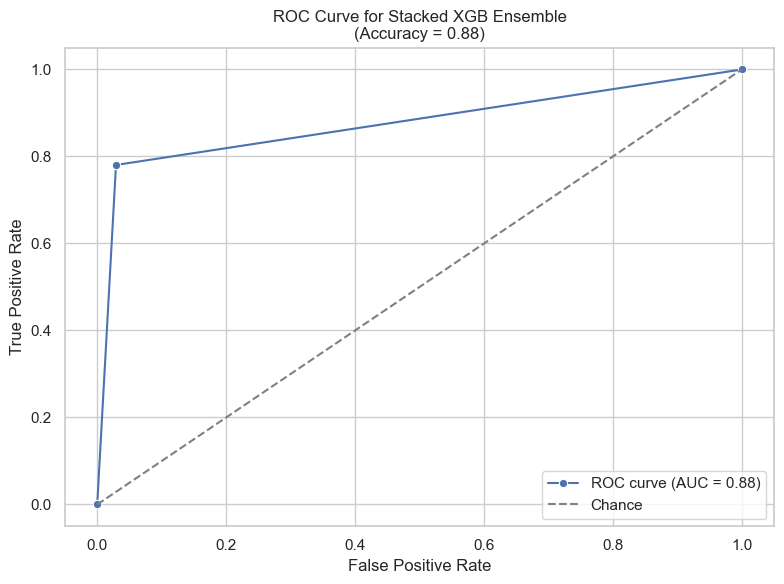

In [66]:
# Known confusion matrix values
tn, fp, fn, tp = 400, 12, 18, 64

# Calculate rates
fpr_point = fp / (fp + tn)
tpr_point = tp / (tp + fn)

# ROC curve points
fpr = [0, fpr_point, 1]
tpr = [0, tpr_point, 1]

# Compute AUC
roc_auc = auc(fpr, tpr)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Plot with Seaborn
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, marker="o", ax=ax, label=f'ROC curve (AUC = {roc_auc:.2f})')
sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", color="gray", ax=ax, label="Chance")

# Labels and title
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve for Stacked XGB Ensemble\n(Accuracy = 0.88)")

# Legend and layout
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()
